# 1.1

In [1]:
%matplotlib inline
from preprocessing import *
from model import *

In [2]:
X,y = Preprocessing()

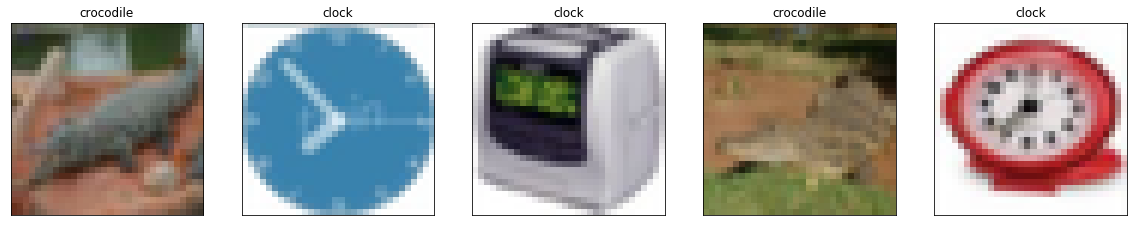

In [3]:
check_preprocessing(X, y)

In [4]:
# Let's take train:val:test ratio as 0.5 : 0.25 : 0.25 = 500 : 250 : 250
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val,  y_train, y_val  = train_test_split(X_train, y_train, test_size=0.333, random_state=0)
X_train, X_val, X_test = swap(X_train), swap(X_val), swap(X_test)
X_train.shape, X_val.shape, X_test.shape

((500, 3, 32, 32), (250, 3, 32, 32), (250, 3, 32, 32))

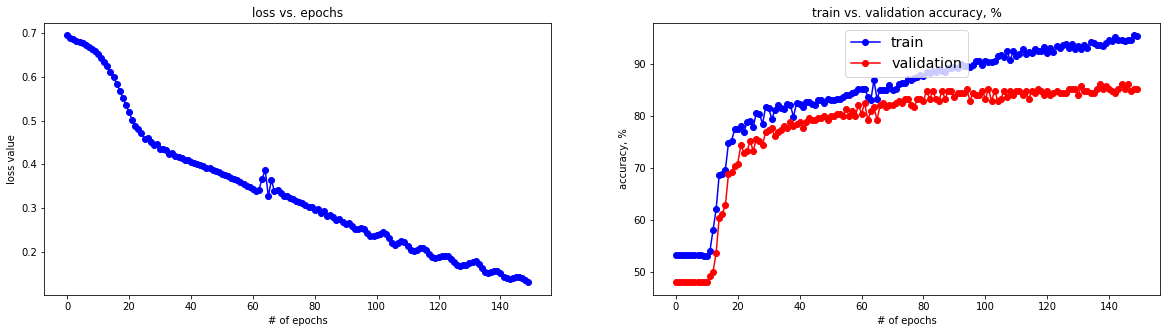

In [5]:
model = SimpleNet().cuda()
loss_history = training_process(model, X_train, y_train, X_val, y_val, n_epochs=150)
torch.save(model.state_dict(), 'model_state')

In [6]:
compute_acc(model, X_train, y_train), \
compute_acc(model, X_val, y_val), \
compute_acc(model, X_test, y_test)

(0.952, 0.852, 0.924)

# 1.2 

### 1st approach:

- take badly recognized images (if predicted label is wrong then image seems to be from different class)

Obviously, it is a very poor idea, because we did not use any augmentation or any other tricks to make our classifier smarter. Then such mistakes are predicted statistically and cannot be considered as some "smart" behavior.

In [7]:
from get_imgs import *

number of badly recognized images: 24


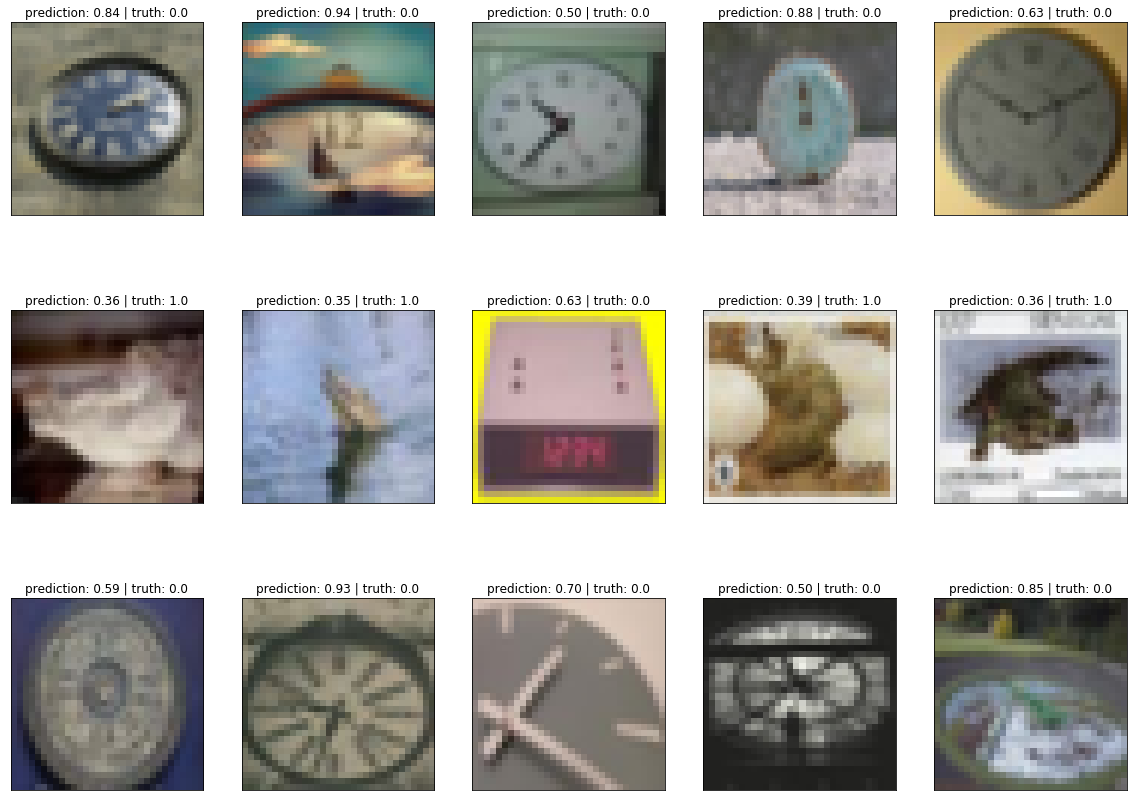

In [8]:
get_wrong_imgs(model, X_train, y_train)

number of badly recognized images: 37


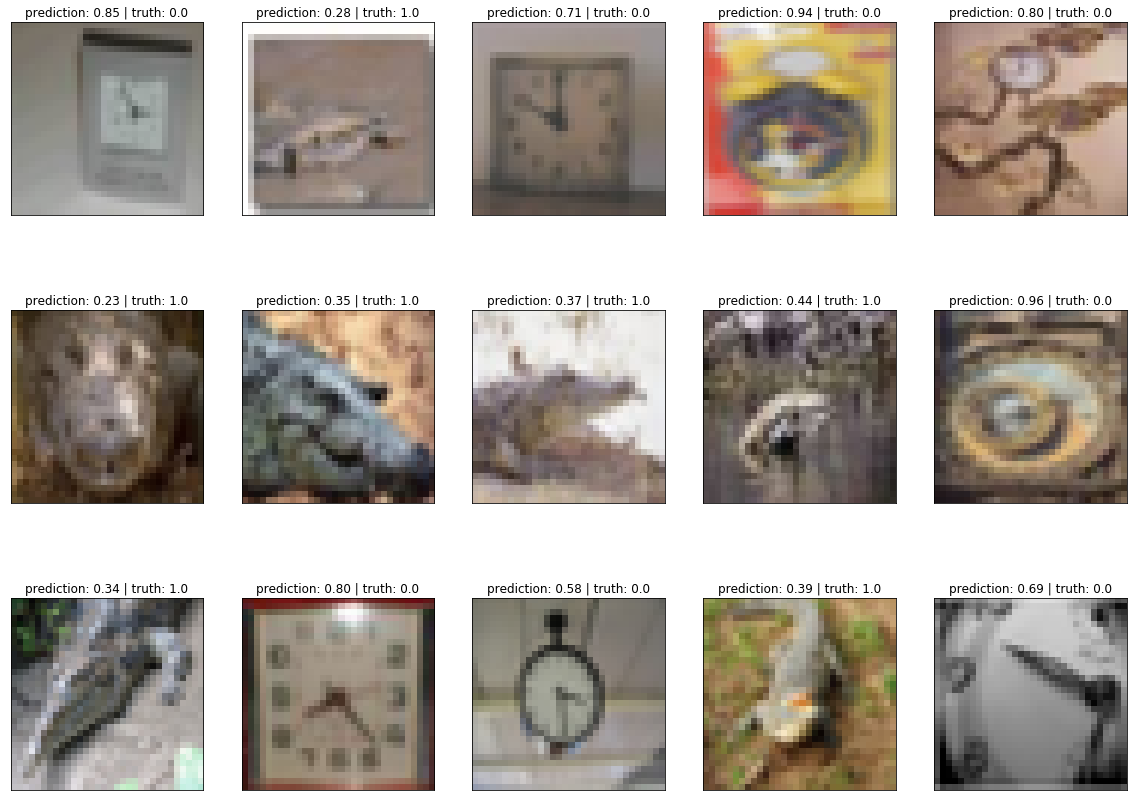

In [9]:
get_wrong_imgs(model, X_val, y_val)

number of badly recognized images: 19


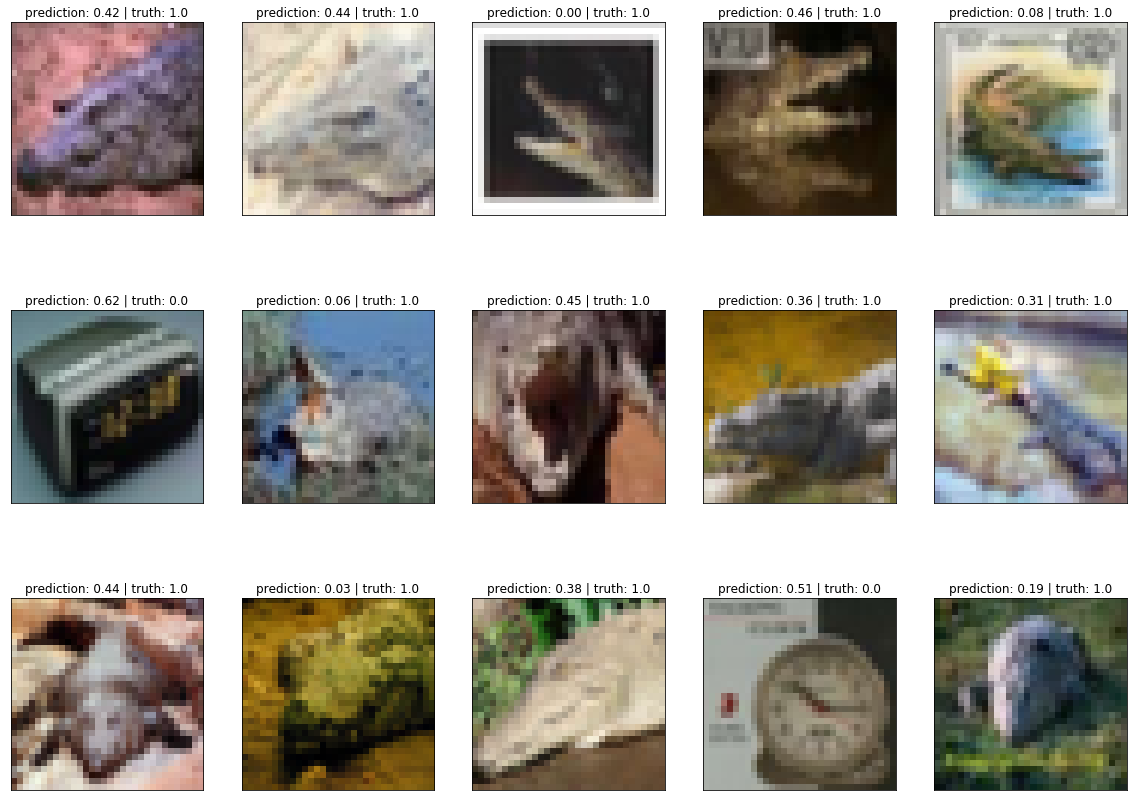

In [10]:
get_wrong_imgs(model, X_test, y_test)

### 2nd approach:

- take inner representations for each class
- take their average values
- find vectors, which lie between two averages as far as possible

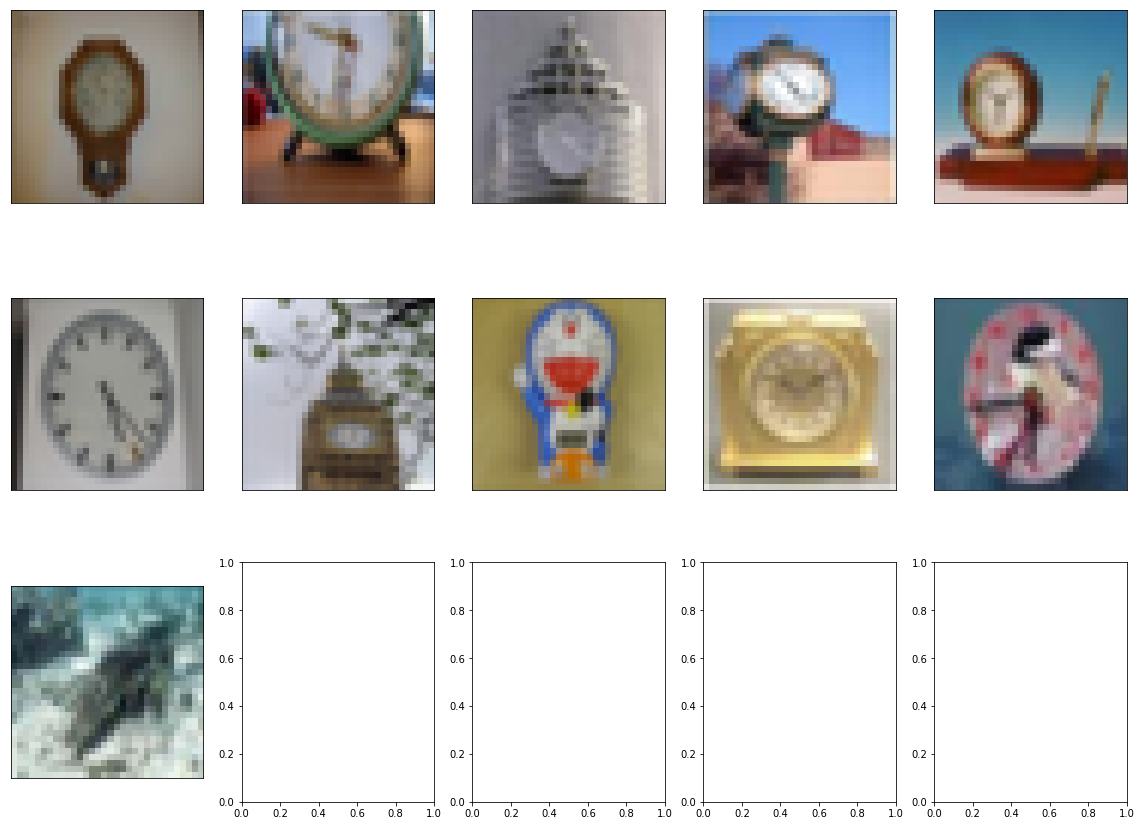

In [11]:
get_strange_imgs_by_inner(model, X, 0.2)

This approach seems much smarter!